In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19776\1825103310.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('titanic/train.csv')

In [3]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:

cols = ['Name', 'Ticket', 'Cabin']
df.drop(cols, axis=1, inplace=True)

In [5]:

df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19776\2662708710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19776\3114099241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [7]:

dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Embarked']], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

In [8]:

df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

In [9]:

X = df.drop('Survived', axis=1)
y = df['Survived']

In [10]:

df.head(5)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,-0.565419,1,0,-0.502163,True,False,True
1,2,1,0.663488,1,0,0.786404,False,False,False
2,3,1,-0.258192,0,0,-0.488580,False,False,True
3,4,1,0.433068,1,0,0.420494,False,False,True
4,5,0,0.433068,0,0,-0.486064,True,False,True


In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:

print(X_train.info())
print(y_train.shape)
print(X_test.info())
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 857 to 684
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Age          623 non-null    float64
 2   SibSp        623 non-null    int64  
 3   Parch        623 non-null    int64  
 4   Fare         623 non-null    float64
 5   Sex_male     623 non-null    bool   
 6   Embarked_Q   623 non-null    bool   
 7   Embarked_S   623 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 31.0 KB
None
(623,)
<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 495 to 64
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Age          268 non-null    float64
 2   SibSp        268 non-null    int64  
 3   Parch        268 non-null    int64  
 4   Fare         268 non-null    float64
 5   Sex_male

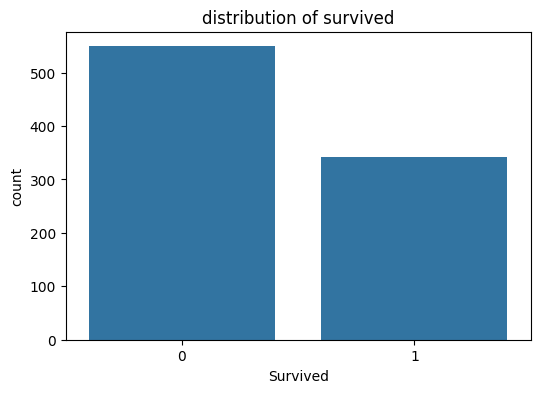

In [13]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('distribution of survived')
plt.show()

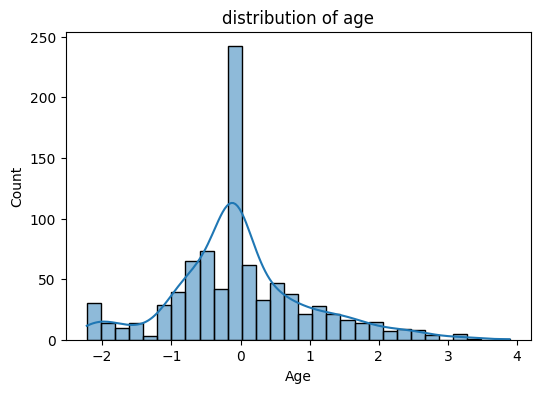

In [14]:

plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('distribution of age')
plt.show()